# Evaluation Of Duet Benchmarking Results from Distributed Database "Cassandra"

### Imports

In [303]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
from pathlib import Path

In [304]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements3.csv")
# print(filepath)
# df3 = pd.read_csv(filepath)

In [305]:
# cwd = Path.cwd()
# filepath = os.path.join(cwd, "Results", "1.25mCops_4t", "AA", "run_measurements2.csv")
# print(filepath)
# df2 = pd.read_csv(filepath)

### Import Benchmarking Measurements as csv file and create Pandas Dataframe for further Analysis

In [306]:
cwd = Path.cwd()
filepath = os.path.join(cwd, "Results","international", "1mCops_4t", "AA", "run_measurements1.csv")
print(filepath)
df = pd.read_csv(filepath)

C:\Users\Felix Medicus\Desktop\Thesis_MCC\DuetBenchmarking\Results\Results\international\1mCops_4t\AA\run_measurements1.csv


In [307]:
# df = pd.concat([df1, df2, df3])
# df = df1

### Set Versions as Variables

In [308]:
workloadLoad = "Workload C: 100% Insert"
workloadRun = "Workload C: 100% Read"
phase = "Run"
versionA = "Version A: Cassandra 4.0.4"
versionB = "Version B: Cassandra 3.0.27"

### Insert latencies in ms into the measurement table

In [309]:
df["latency_ms"] = (df["received"]- df["sent"])/1000000

In [310]:
df["sent_ms"] = df["sent"].div(1000000)
df["received_ms"] = df["received"].div(1000000)

In [311]:
df.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms
count,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06,2.000000e+06
mean,4.999995e+05,3.406594e+12,3.406602e+12,8.016074e+00,3.406594e+06,3.406602e+06
std,2.886752e+05,2.549844e+11,2.549850e+11,2.447347e+01,2.549844e+05,2.549850e+05
min,0.000000e+00,2.978896e+12,2.978899e+12,5.180600e-01,2.978896e+06,2.978899e+06
25%,2.499998e+05,3.184878e+12,3.184882e+12,1.265264e+00,3.184878e+06,3.184882e+06
50%,4.999995e+05,3.388881e+12,3.388885e+12,1.637008e+00,3.388881e+06,3.388885e+06
75%,7.499992e+05,3.623088e+12,3.623099e+12,2.456167e+00,3.623088e+06,3.623099e+06
max,9.999990e+05,3.940810e+12,3.940813e+12,9.694408e+02,3.940810e+06,3.940813e+06


In [312]:
df = df.sort_values(by="sent", ascending=True)
df.head()

,workerId,queryType,queryId,sent,received,target-region,latency_ms,sent_ms,received_ms
2,w1-vA,UPDATE,0,2978896392465,2978899614162,europe-west1,3.221697,2.978896e+06,2.978900e+06
1,w1-vA,UPDATE,333336,2978896955908,2978899525821,europe-west1,2.569913,2.978897e+06,2.978900e+06
4,w1-vB,UPDATE,0,2978897159883,2978904678852,europe-west1,7.518969,2.978897e+06,2.978905e+06
3,w1-vB,UPDATE,333336,2978897369120,2978904275175,europe-west1,6.906055,2.978897e+06,2.978904e+06
0,w1-vA,UPDATE,666672,2978897730798,2978899318362,europe-west1,1.587564,2.978898e+06,2.978899e+06


### Restructure Timeline

In [313]:
firstSent = df["sent"].min()
df["sent_sec"] = (df["sent"] - firstSent)/1000000/1000

### Return benchmark run time (First request send to last response received)

In [314]:
totalTime = df["sent"].max() - df["sent"].min()
print(totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "m") 

961.914030405 seconds or 16.03190050675 m


### Prune Measurements and print new run time for pruned benchmark (Remove first and last 100 seconds)

In [315]:
dfPruned = df.loc[(df["sent_sec"] > 200) & (df["sent_sec"] < (totalTime/1000000/1000) - 100)]

In [316]:
totalTime = dfPruned["sent"].max() - dfPruned["sent"].min()
print("Pruned time:\n",totalTime/1000000/1000, "seconds", "or", totalTime/1000000/1000/60, "minutes") 

Pruned time:
 661.900580667 seconds or 11.03167634445 minutes


### Create subsets of dataframe (for Version A and B, and for each worker for Version A and B) 

In [317]:
dfA1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vA")]
dfA2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vA")]
dfA3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vA")]
dfB1 = dfPruned.loc[(dfPruned["workerId"] == "w1-vB")]
dfB2 = dfPruned.loc[(dfPruned["workerId"] == "w2-vB")]
dfB3 = dfPruned.loc[(dfPruned["workerId"] == "w3-vB")]
dfA = dfPruned.loc[(dfPruned["workerId"] == "w1-vA") | (dfPruned["workerId"] == "w2-vA") | (dfPruned["workerId"] == "w3-vA")]
dfB = dfPruned.loc[(dfPruned["workerId"] == "w1-vB") | (dfPruned["workerId"] == "w2-vB") | (dfPruned["workerId"] == "w3-vB")]
dfARaw = df.loc[(df["workerId"] == "w1-vA") | (df["workerId"] == "w2-vA") | (df["workerId"] == "w3-vA")]
dfBRaw = df.loc[(df["workerId"] == "w1-vB") | (df["workerId"] == "w2-vB") | (df["workerId"] == "w3-vB")]

In [318]:
dfARaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,3.407453e+12,3.407461e+12,8.024535,3.407453e+06,3.407461e+06,428.556301
std,288675.278932,2.560739e+11,2.560745e+11,24.476534,2.560739e+05,2.560745e+05,256.073889
min,0.000000,2.978896e+12,2.978899e+12,0.518060,2.978896e+06,2.978899e+06,0.000000
25%,249999.750000,3.185200e+12,3.185204e+12,1.271419,3.185200e+06,3.185204e+06,206.303560
50%,499999.500000,3.389194e+12,3.389199e+12,1.645894,3.389194e+06,3.389199e+06,410.297517
75%,749999.250000,3.623965e+12,3.623973e+12,2.471981,3.623965e+06,3.623973e+06,645.068827
max,999999.000000,3.940810e+12,3.940813e+12,950.038318,3.940810e+06,3.940813e+06,961.914030


In [319]:
dfBRaw.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000,1.000000e+06,1.000000e+06,1000000.000000
mean,499999.500000,3.405736e+12,3.405744e+12,8.007614,3.405736e+06,3.405744e+06,426.839276
std,288675.278932,2.538874e+11,2.538881e+11,24.470411,2.538874e+05,2.538881e+05,253.887385
min,0.000000,2.978897e+12,2.978904e+12,0.530808,2.978897e+06,2.978904e+06,0.000767
25%,249999.750000,3.184510e+12,3.184521e+12,1.259299,3.184510e+06,3.184521e+06,205.613371
50%,499999.500000,3.388455e+12,3.388458e+12,1.628000,3.388455e+06,3.388458e+06,409.558938
75%,749999.250000,3.622242e+12,3.622245e+12,2.440283,3.622242e+06,3.622245e+06,643.345651
max,999999.000000,3.928562e+12,3.928564e+12,969.440762,3.928562e+06,3.928564e+06,949.665694


In [320]:
dfA.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,723408.000000,7.234080e+05,7.234080e+05,723408.000000,7.234080e+05,7.234080e+05,723408.000000
mean,535414.414773,3.491076e+12,3.491084e+12,8.214103,3.491076e+06,3.491084e+06,512.179198
std,281303.080970,1.912166e+11,1.912173e+11,26.069992,1.912166e+05,1.912173e+05,191.216557
min,77319.000000,3.178897e+12,3.178899e+12,0.518060,3.178897e+06,3.178899e+06,200.000844
25%,261156.750000,3.325659e+12,3.325663e+12,1.294737,3.325659e+06,3.325663e+06,346.762156
50%,535579.500000,3.477435e+12,3.477438e+12,1.676175,3.477435e+06,3.477438e+06,498.538360
75%,807553.250000,3.657728e+12,3.657733e+12,2.524479,3.657728e+06,3.657733e+06,678.831930
max,999998.000000,3.840797e+12,3.840919e+12,950.038318,3.840797e+06,3.840919e+06,861.900500


In [321]:
dfB.describe()

,queryId,sent,received,latency_ms,sent_ms,received_ms,sent_sec
count,725744.000000,7.257440e+05,7.257440e+05,725744.000000,7.257440e+05,7.257440e+05,725744.000000
mean,535548.199744,3.491420e+12,3.491429e+12,8.191004,3.491420e+06,3.491429e+06,512.524012
std,281115.679762,1.913908e+11,1.913916e+11,26.038417,1.913908e+05,1.913916e+05,191.390824
min,76482.000000,3.178898e+12,3.178900e+12,0.530808,3.178898e+06,3.178900e+06,200.001378
25%,262711.750000,3.325741e+12,3.325747e+12,1.279747,3.325741e+06,3.325747e+06,346.844524
50%,534636.500000,3.477954e+12,3.477958e+12,1.658697,3.477954e+06,3.477958e+06,499.057842
75%,808366.250000,3.658663e+12,3.658668e+12,2.495072,3.658663e+06,3.658668e+06,679.766117
max,999997.000000,3.840798e+12,3.840928e+12,969.440762,3.840798e+06,3.840928e+06,861.901424


### Calculate Percentiles

In [322]:
ninetyA = dfA["latency_ms"].dropna().quantile([.9])
ninetynineA = dfA["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyA, "\n99% percentile Version A --> ", ninetynineA)


90% percentile versionA -->  0.9    12.132544
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    146.774363
Name: latency_ms, dtype: float64


In [323]:
ninetyB = dfB["latency_ms"].dropna().quantile([.9])
ninetynineB = dfB["latency_ms"].dropna().quantile([.99])
print("90% percentile versionA --> ", ninetyB, "\n99% percentile Version A --> ", ninetynineB)

90% percentile versionA -->  0.9    12.130083
Name: latency_ms, dtype: float64 
99% percentile Version A -->  0.99    146.649811
Name: latency_ms, dtype: float64


### Min. Latencies for Worker 2 (A & B)

In [324]:
dfA3.loc[dfA3["latency_ms"].idxmin()]

workerId                  w3-vA
queryType                UPDATE
queryId                  453581
sent              3261392654338
received          3261393608087
target-region      europe-west3
latency_ms             0.953749
sent_ms          3261392.654338
received_ms      3261393.608087
sent_sec             282.496262
Name: 1570019, dtype: object

In [325]:
dfB1.loc[dfB1["latency_ms"].idxmin()]

workerId                  w1-vB
queryType                UPDATE
queryId                  150630
sent              3366461609267
received          3366462230469
target-region      europe-west1
latency_ms             0.621202
sent_ms          3366461.609267
received_ms      3366462.230469
sent_sec             387.565217
Name: 298317, dtype: object

In [326]:
df[df.received == 999999999999999999].shape[0]


0

### Some checks

#### Time difference in ms when first query was sent by worker-1 to Version A and B 

In [327]:

dfA2["sent"].min() - dfB2["sent"].min()

-664625

#### Time difference in ms when last query was sent by worker-1 to Version A and B 

In [328]:
dfA1["sent"].max() - dfB1["sent"].max() 


-924200

## Create Figures 

### Create Boxplots

In [329]:
sns.set_theme(style="darkgrid")
print(len(dfA))

723408


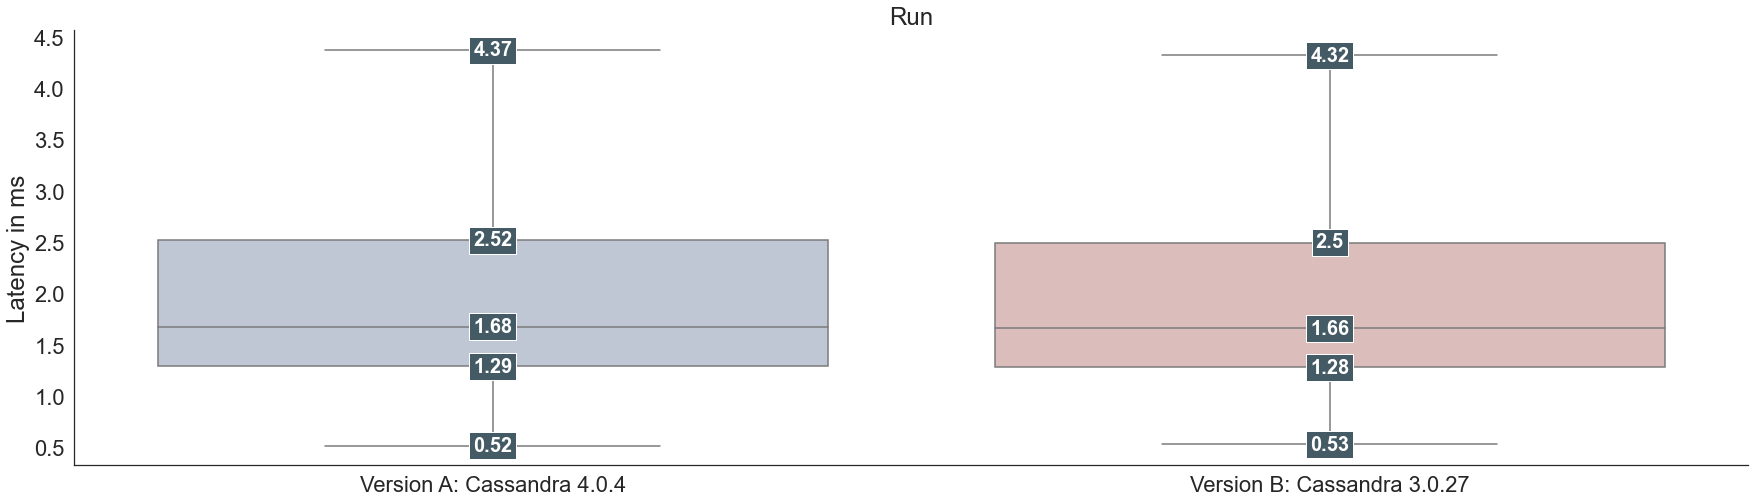

In [330]:

combined_dfs = pd.DataFrame({versionA: dfA['latency_ms'],
                             versionB: dfB['latency_ms']})
                             
sns.set_style('white')
sns.set_context('notebook', font_scale=2.0)

box_plot = sns.boxplot(data=combined_dfs, color='white', showfliers=False, whis=1.5,palette="vlag").set_title(phase)




ax = box_plot.axes
ax.set_ylabel("Latency in ms")
lines = ax.get_lines()

categories = ax.get_xticks()

for i in range(0,5):
    for cat in categories:

        y = round(lines[(i+cat*5)].get_ydata()[0],2) 

        ax.text(
            cat, 
            y, 
            f'{y}', 
            ha='center', 
            va='center', 
            fontweight='bold', 
            size=20,
            color='white',
            bbox=dict(facecolor='#445A64'))


sns.despine()



In [331]:
sns.set_context("notebook")
sns.set(rc={'figure.figsize':(30,8)})
print(len(df))

2000000


### Create Lineplot comparing latencies of Version A and B

C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_13972\2150790566.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
C:\Users\Felix Medicus\AppData\Local\Temp\ipykernel_13972\2150790566.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)


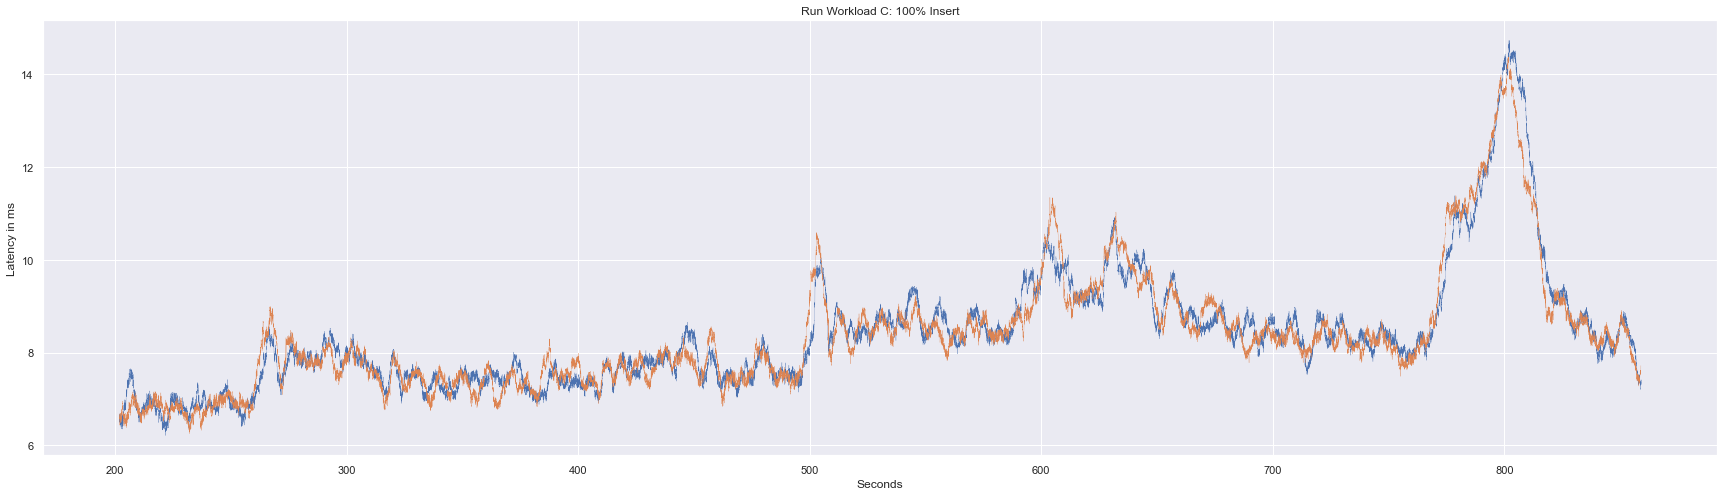

In [332]:
subchartA = dfA[['sent_sec', 'latency_ms']]
subchartB = dfB[['sent_sec', 'latency_ms']]
subchartA["100sec_average"] = subchartA.latency_ms.rolling(5000).mean().shift(-2500)
subchartB["100sec_average"] = subchartB.latency_ms.rolling(5000).mean().shift(-2500)

p = sns.lineplot(data=subchartA, x="sent_sec", y="100sec_average", linewidth=0.25)
title =  phase + " " + workloadLoad  if phase=="Run" else phase
sns.lineplot(data=subchartB, x='sent_sec',y='100sec_average', linewidth=0.25).set_title(title)
p.set_xlabel("Seconds");
p.set_ylabel("Latency in ms");
